In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

inward = pd.read_csv('D:/2probe/clean/nano/inward_cut_back.csv')
reverse = pd.read_csv('D:/2probe/clean/nano/reverse_cut_back.csv')

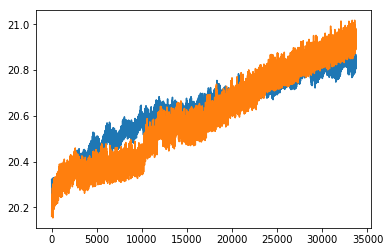

In [4]:
plt.plot(inward['time'],inward['R'])
plt.plot(reverse['time'],reverse['R'])

In [6]:
print(inward.head())
print(inward.tail())
print(reverse.head())
print(reverse.tail())

      time         R
0  0.00000  20.32062
1  0.42712  20.31828
2  0.85312  20.31507
3  1.27811  20.31145
4  1.70313  20.30858
              time         R
79175  33729.56132  20.84278
79176  33729.98731  20.84338
79177  33730.41233  20.84560
79178  33730.83834  20.84757
79179  33731.26444  20.84967
      time         R
0  0.00000  20.16021
1  0.42713  20.16368
2  0.85412  20.16630
3  1.27912  20.16989
4  1.70412  20.17354
              time         R
79175  33729.41532  20.89309
79176  33729.84231  20.89287
79177  33730.26833  20.89330
79178  33730.69332  20.89290
79179  33731.12044  20.89235


In [7]:
T=33.7312
P1=1000       #cycles in inward data
P2=1000       #cycles in reverese data
accuracy=1.0  #lowest and highest point in every cycle is not a single point
# it is in fact average of several measuremnts during 1.0s, to avoid outlier

In [8]:
def low_high1(inward):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T/2.0
    high_start=T
    for i in range(P1):
        low.append(inward.loc[(inward['time']>low_start-(accuracy/2.0))&(inward['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(inward.loc[(inward['time']>high_start-(accuracy/2.0))&(inward['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

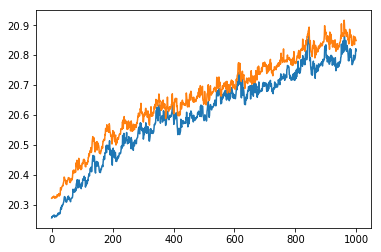

In [9]:
low,high,low_ave,high_ave=low_high1(inward)
#plot lowest and highest point of every cycle
plt.plot(low)
plt.plot(high)

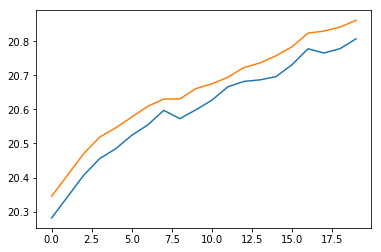

In [10]:
#plot average oflowest and highest point of every 50 cycles
plt.plot(low_ave)
plt.plot(high_ave)

In [11]:
def low_high2(reverse):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T
    high_start=T/2.0
    for i in range(P1):
        low.append(reverse.loc[(reverse['time']>low_start-(accuracy/2.0))&(reverse['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(reverse.loc[(reverse['time']>high_start-(accuracy/2.0))&(reverse['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

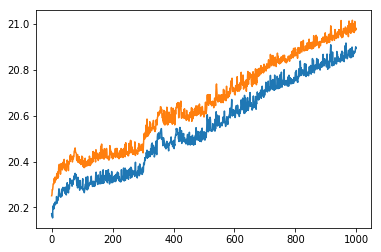

In [12]:
low,high,low_ave,high_ave=low_high2(reverse)

plt.plot(low)
plt.plot(high)

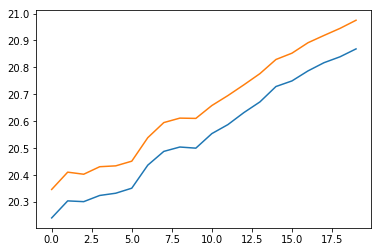

In [13]:
plt.plot(low_ave)
plt.plot(high_ave)